# Assignment 4

### Aarnav Nagariya 2021112017

## Task 1

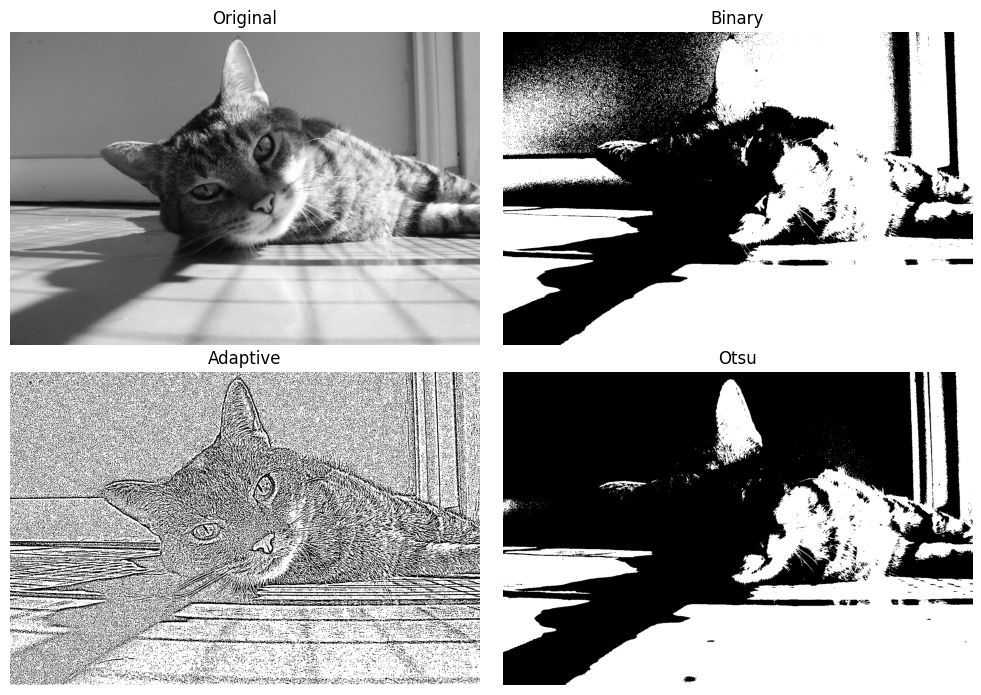

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread("../images/cat_grey.jpg", cv2.IMREAD_GRAYSCALE)

# Binary Thresholding
_, binary_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# Otsu's Thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display results
titles = ['Original', 'Binary', 'Adaptive', 'Otsu']
images = [image, binary_thresh, adaptive_thresh, otsu_thresh]

plt.figure(figsize=(10, 7))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


1. **Otsu's Thresholding** is effective for images with a bimodal histogram, as it automatically determines the optimal threshold, resulting in clear object boundaries with minimal noise.
2. **Adaptive Thresholding** is better for images with uneven lighting, as it calculates thresholds locally, ensuring good segmentation in varying brightness regions.
3. **Binary Thresholding** works well for simple images with clear contrasts but is less effective with noise or uneven lighting.


We can see in this image that adaptive thresholding gives clearer image but it has lots of noise in it. Otsu's thresholding gives a clear image but the image is not as clear as adaptive thresholding and the lighting of the  background and cat's face disappear. Binary thresholding gives a very noisy image and lot of features are missing form the original image.

## Task 2

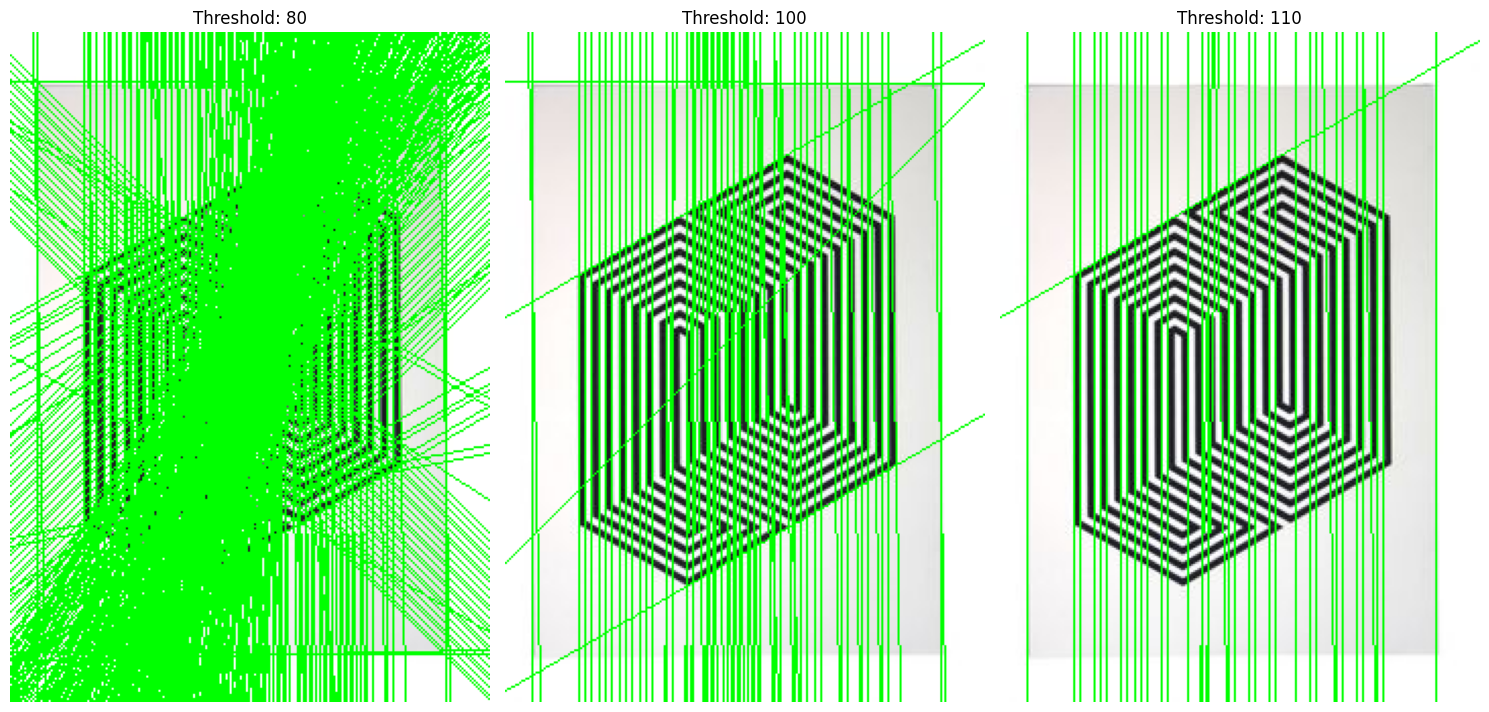

In [39]:
image = cv2.imread("../images/lines_img.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150)

def hough_transform(edges, threshold):
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)
    result = image.copy()
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a * rho, b * rho
            x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * a)
            x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * a)
            cv2.line(result, (x1, y1), (x2, y2), (0, 255, 0), 1)
    return result

thresholds = [80, 100, 110]
results = [hough_transform(edges, t) for t in thresholds]

plt.figure(figsize=(15, 7))
for i, t in enumerate(thresholds):
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv2.cvtColor(results[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Threshold: {t}")
    plt.axis('off')
plt.tight_layout()
plt.show()


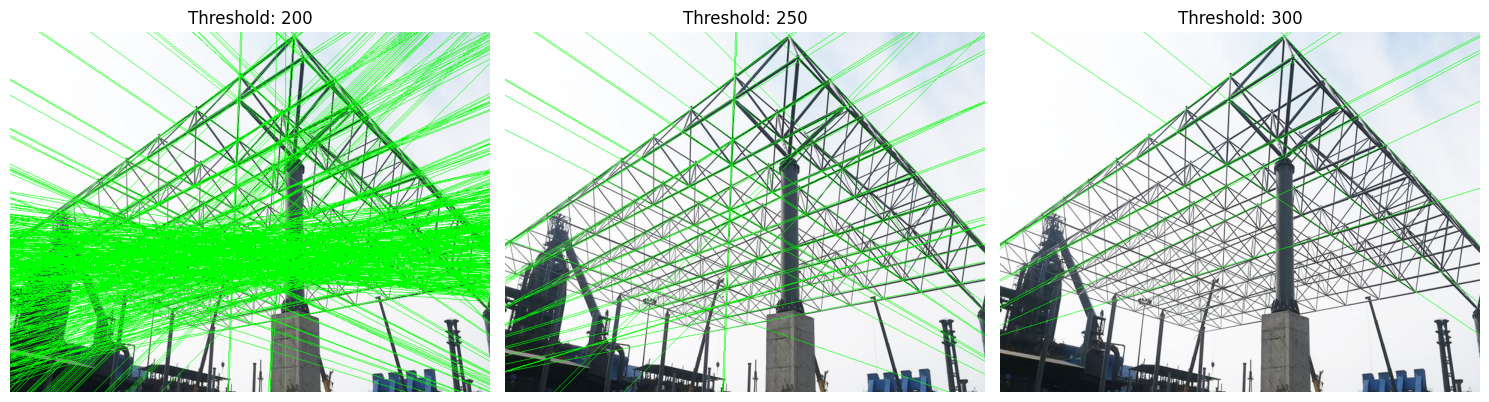

In [43]:
image = cv2.imread("../images/grid.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150)

def hough_transform(edges, threshold):
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)
    result = image.copy()
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a * rho, b * rho
            x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * a)
            x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * a)
            cv2.line(result, (x1, y1), (x2, y2), (0, 255, 0), 1)
    return result

thresholds = [200,250, 300]
results = [hough_transform(edges, t) for t in thresholds]

plt.figure(figsize=(15, 7))
for i, t in enumerate(thresholds):
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv2.cvtColor(results[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Threshold: {t}")
    plt.axis('off')
plt.tight_layout()
plt.show()


1. Lower thresholds detect more lines, including noise or irrelevant ones.
2. Higher thresholds focus on prominent lines, reducing false positives but potentially missing weaker lines.

An optimal threshold balances detecting important lines while avoiding clutter.


## Task 3

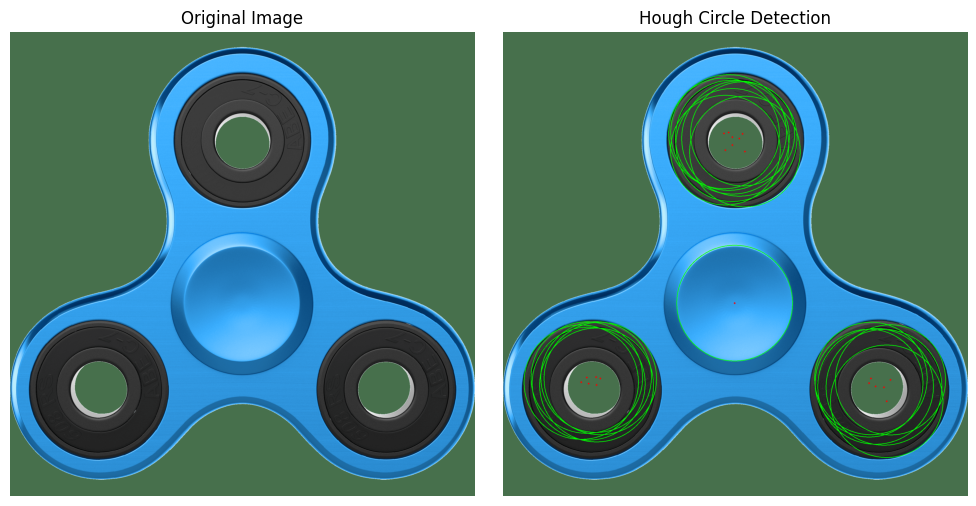

In [55]:
image = cv2.imread("../images/fidget.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Hough Circle Transform
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=50, minRadius=200, maxRadius=250)

result = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(result, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(result, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Hough Circle Detection")
plt.axis('off')

plt.tight_layout()
plt.show()


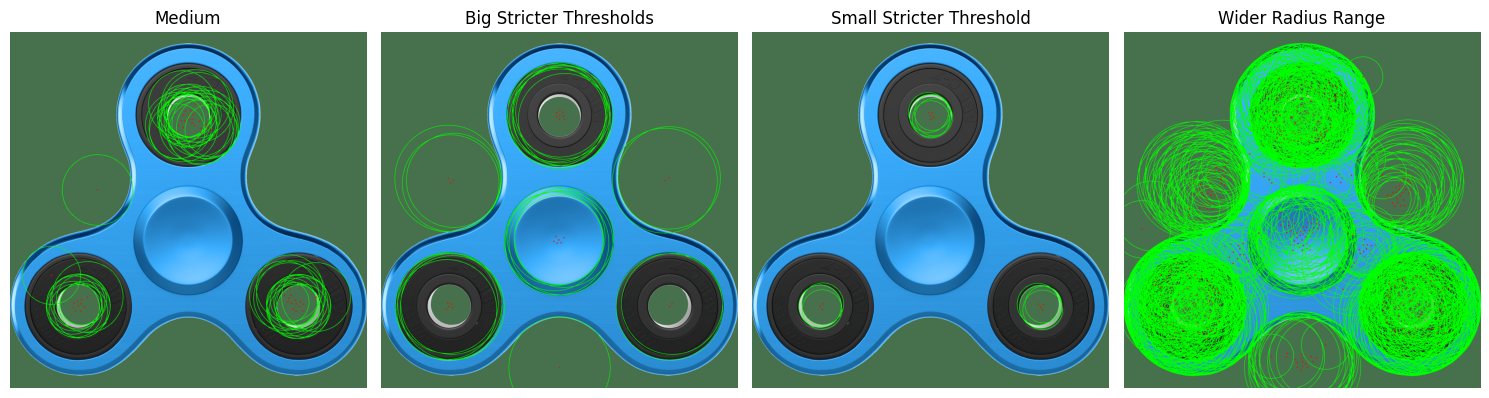

In [61]:
image = cv2.imread("../images/fidget.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

def hough_circle_transform(blurred, dp, minDist, param1, param2, minRadius, maxRadius):
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=dp, minDist=minDist,
                               param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)
    result = image.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(result, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(result, (i[0], i[1]), 2, (0, 0, 255), 3)
    return result

params = [
    (1, 20, 50, 30, 100, 200),  # Default parameters
    (1, 20, 100, 40, 250, 300),  # Stricter thresholds
    (1, 20, 50, 20, 100, 120),  # SMall Strict
    (1, 20, 50, 20, 100, 300),  # Wider radius range
]

results = [hough_circle_transform(blurred, *p) for p in params]

titles = ["Medium", "Big Stricter Thresholds","Small Stricter Threshold", "Wider Radius Range"]
plt.figure(figsize=(15, 7))
for i, title in enumerate(titles):
    plt.subplot(1, 4, i + 1)
    plt.imshow(cv2.cvtColor(results[i], cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()


We can see that the first some circles were detected in the image but as the threshold increased, the number of circles detected decreased. This is because the higher threshold is more selective and only detects the most prominent circles.

for wider radius we can see that it detects almost all types of circles but is also giving false positives as well as false negatives.

## Task 4

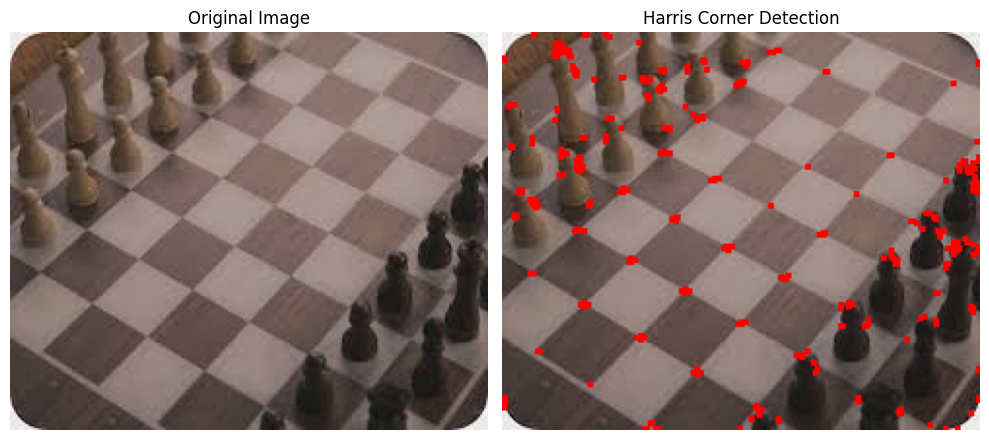

In [79]:
image = cv2.imread("../images/chess2.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Harris 
gray = np.float32(gray)
harris = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.1)

# Dilate 
harris = cv2.dilate(harris, None)

# Mark corners in the original image
result = image.copy()
result[harris > 0.01 * harris.max()] = [0, 0, 255]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis('off')

plt.tight_layout()
plt.show()


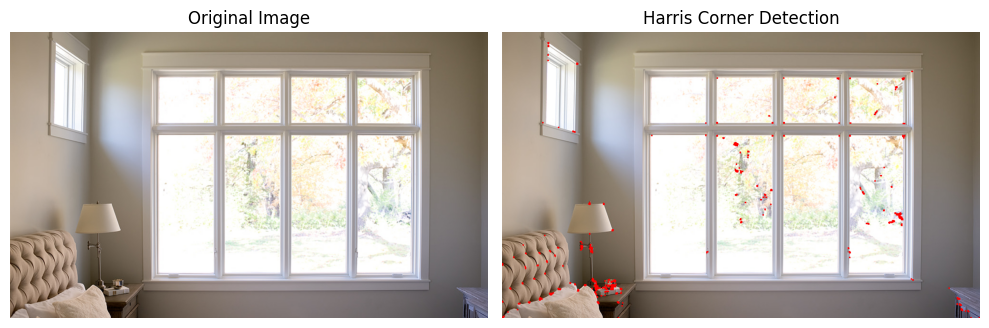

In [19]:
image = cv2.imread("../images/room.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
harris = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.01)

harris = cv2.dilate(harris, None)

result = image.copy()
result[harris > 0.01 * harris.max()] = [0, 0, 255]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis('off')

plt.tight_layout()
plt.show()


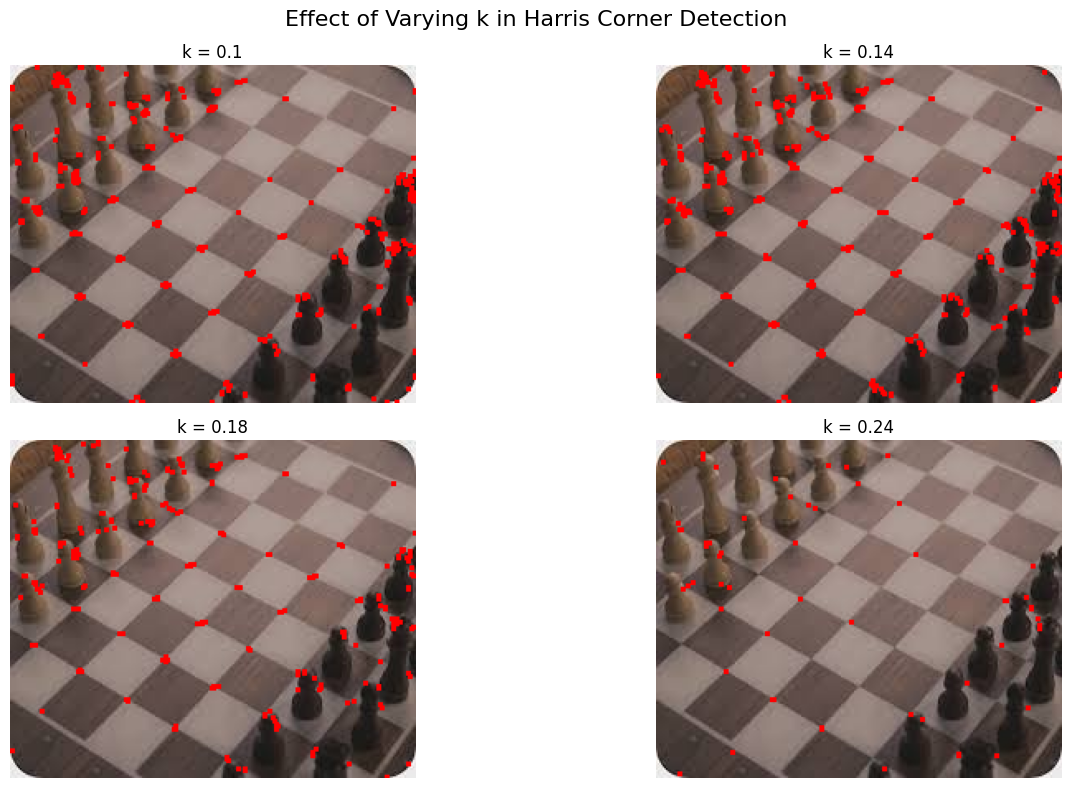

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("../images/chess2.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

k_values = [0.1,0.14, 0.18, 0.24]

plt.figure(figsize=(15, 8))

for i, k in enumerate(k_values):
    harris = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=k)
    harris = cv2.dilate(harris, None)

    result = image.copy()
    result[harris > 0.01 * harris.max()] = [0, 0, 255]

    # Plot the result
    plt.subplot(2, int(len(k_values)/2), i + 1)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(f"k = {k}")
    plt.axis("off")

plt.suptitle("Effect of Varying k in Harris Corner Detection", fontsize=16)
plt.tight_layout()
plt.show()


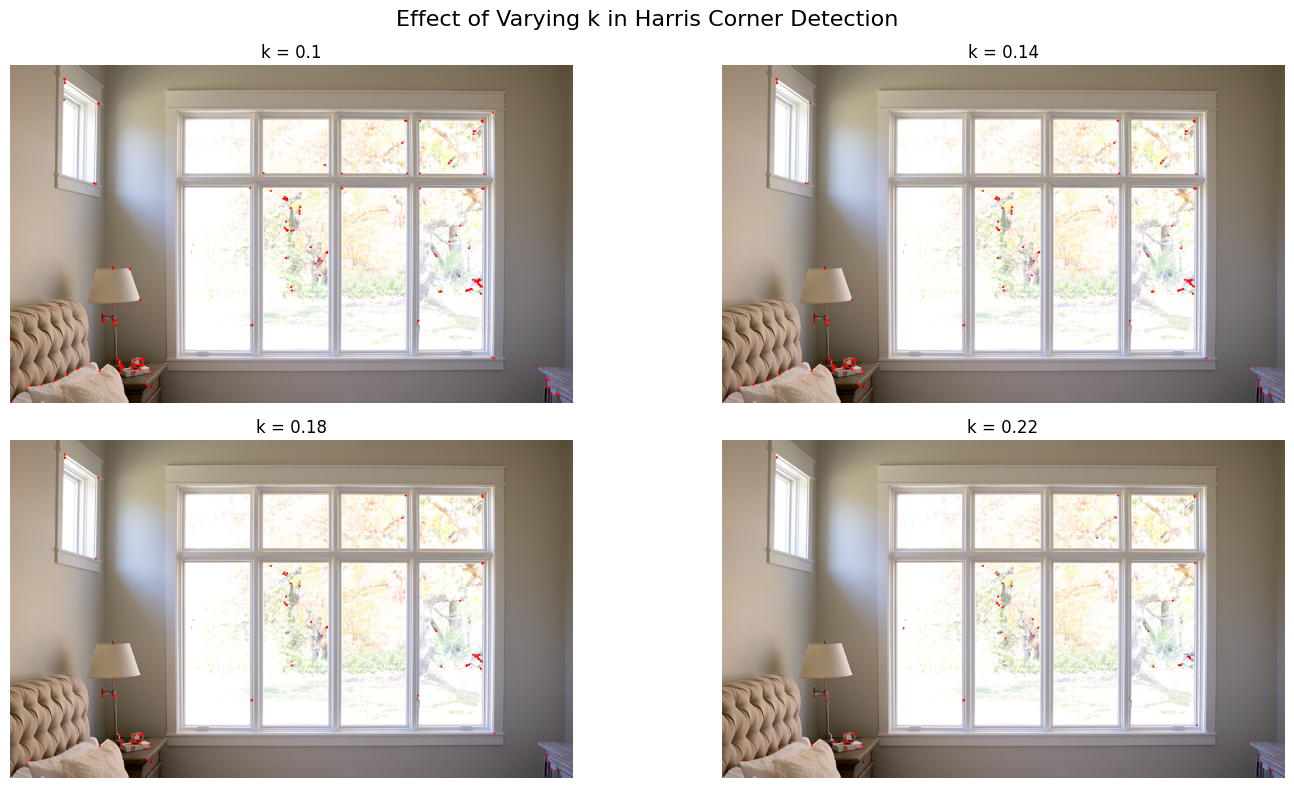

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("../images/room.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

k_values = [0.1,0.14, 0.18, 0.22]

plt.figure(figsize=(15, 8))

for i, k in enumerate(k_values):
    harris = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=k)
    harris = cv2.dilate(harris, None)

    result = image.copy()
    result[harris > 0.01 * harris.max()] = [0, 0, 255]

    # Plot the result
    plt.subplot(2, int(len(k_values)/2), i + 1)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(f"k = {k}")
    plt.axis("off")

plt.suptitle("Effect of Varying k in Harris Corner Detection", fontsize=16)
plt.tight_layout()
plt.show()


1. Lower 𝑘 Values: Detects more corners, but may include false positives in areas with high intensity gradients (e.g., edges).
2. Higher 𝑘 Values: Detects fewer corners, focusing on prominent ones, but may miss subtler corners.

## Task 5

The Hough Transform differs significantly in detecting lines versus circles due to differences in parameter space and computational complexity.

**Line Detection**: The Hough Transform for lines uses a 2D parameter space defined by 
𝜌 (distance from the origin) and 
𝜃 (angle of the normal to the line). Each edge point votes in this space, and a peak represents a detected line. This approach is computationally efficient because the 2D space is relatively small.

**Circle Detection**: For circles, the parameter space expands to 3D, including 
𝑥, 
𝑦 (center coordinates), and the radius 
𝑟. Each edge point contributes to multiple votes in this space, significantly increasing computational complexity. To optimize, additional preprocessing like edge detection and radius constraints is often applied.

In summary, line detection is faster and less resource-intensive due to its simpler parameterization, while circle detection requires more processing time and memory because of the additional radius dimension.